# Logistic Regression Classifier on Text Data (Concerns)

Lilian (Yuanyuan) Sun | lilian@curajoy.com

# Import Libraries  & Load Data
Load data and preprocessing dependent & independent variables' name

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Data path
file_path = r"./data samples-02-28-2024/Concerns-2-28-2024-V0.5.csv"

# Load data into a pandas DataFrame
df_concerns = pd.read_csv(file_path)

# Display top 5 rows
df_concerns.head(5)

Concerns                         More detailed descriptions  \
0  Better academics  want/need to do better in school.  If just not...   
1      Active Quest         user is a primary or participating quester   
2             ADHD                diagnosed with ADHD or suspects ADHD   
3    Excess Alcohol  dealing with stress by excessive drinking, bin...   
4            Anger   difficulty controlling anger or rage, needs he...   

                                         User Inputs  \
0  want/need to do better in school.  If just not...   
1         user is a primary or participating quester   
2               diagnosed with ADHD or suspects ADHD   
3  dealing with stress by excessive drinking, bin...   
4  difficulty controlling anger or rage, needs he...   

                                             Intents  \
0  MoodFrustrated, MoodStressed, Mood-Journal, Pe...   
1                                                NaN   
2  Tardies, Absences, MoodFrustrated, Invite Chec...   
3                                           Absences   
4                          MoodAngry, MoodFrustrated   

                                      Quests (Goals)  Status  \
0  Plan better (time management), Finish what I s...     NaN   
1                                                NaN     NaN   
2  Take care of my body, Healthy relationship wit...     NaN   
3  Practice impulse control and moderation, Cut m...     NaN   
4  Winning and losing graciously, Practice impuls...     NaN   

                                      Scoring Groups Intent Groups  \
0                                                NaN           NaN   
1                                                NaN           NaN   
2  Special Ed, Access/Tangible Function, Escape/A...           NaN   
3  Alcohol Suspected, High difficulties, Slightly...           NaN   
4  High difficulties, Slightly raised difficultie...           NaN   

   Coaches Responses                       Linked Behaviors  \
0                NaN  Doing something other than assignment   
1                NaN                                    NaN   
2                NaN  Doing something other than assignment   
3                NaN                         Binge drinking   
4                NaN                                    NaN   

                                   Linked Activities  
0  apply to 5 colleges, apply to 5 jobs, assemble...  
1                                                NaN  
2  take my medication(s) as prescribed, Be ready ...  
3                      Arrange childcare for a night  
4  do a body check in, Become more self aware by ...

In [2]:
# Display the original column's name
df_concerns.columns

Index(['Concerns', 'More detailed descriptions', 'User Inputs', 'Intents',
       'Quests (Goals)', 'Status', 'Scoring Groups', 'Intent Groups',
       'Coaches Responses', 'Linked Behaviors', 'Linked Activities'],
      dtype='object')

In [3]:
# Define a mapping of original column names to new names
column_mapping = {
    'Concerns': 'concerns',
    'More detailed descriptions': 'detailed_descriptions',
    'User Inputs': 'user_inputs',
    'Status': 'status',
    'Intents': 'intents',
    'Quests (Goals)': 'quests_goals',
    'Scoring Groups': 'scoring_groups',
    'Intent Groups': 'intent_groups',
    'Utterances': 'utterances',
    'Coaches Responses': 'coaches_responses',
    'Linked Behaviors': 'linked_behaviors',
    'Linked Activities': 'linked_activities'
}

# Rename columns
df_concerns.rename(columns=column_mapping, inplace=True)
df_concerns.head()

concerns                              detailed_descriptions  \
0  Better academics  want/need to do better in school.  If just not...   
1      Active Quest         user is a primary or participating quester   
2             ADHD                diagnosed with ADHD or suspects ADHD   
3    Excess Alcohol  dealing with stress by excessive drinking, bin...   
4            Anger   difficulty controlling anger or rage, needs he...   

                                         user_inputs  \
0  want/need to do better in school.  If just not...   
1         user is a primary or participating quester   
2               diagnosed with ADHD or suspects ADHD   
3  dealing with stress by excessive drinking, bin...   
4  difficulty controlling anger or rage, needs he...   

                                             intents  \
0  MoodFrustrated, MoodStressed, Mood-Journal, Pe...   
1                                                NaN   
2  Tardies, Absences, MoodFrustrated, Invite Chec...   
3                                           Absences   
4                          MoodAngry, MoodFrustrated   

                                        quests_goals  status  \
0  Plan better (time management), Finish what I s...     NaN   
1                                                NaN     NaN   
2  Take care of my body, Healthy relationship wit...     NaN   
3  Practice impulse control and moderation, Cut m...     NaN   
4  Winning and losing graciously, Practice impuls...     NaN   

                                      scoring_groups intent_groups  \
0                                                NaN           NaN   
1                                                NaN           NaN   
2  Special Ed, Access/Tangible Function, Escape/A...           NaN   
3  Alcohol Suspected, High difficulties, Slightly...           NaN   
4  High difficulties, Slightly raised difficultie...           NaN   

   coaches_responses                       linked_behaviors  \
0                NaN  Doing something other than assignment   
1                NaN                                    NaN   
2                NaN  Doing something other than assignment   
3                NaN                         Binge drinking   
4                NaN                                    NaN   

                                   linked_activities  
0  apply to 5 colleges, apply to 5 jobs, assemble...  
1                                                NaN  
2  take my medication(s) as prescribed, Be ready ...  
3                      Arrange childcare for a night  
4  do a body check in, Become more self aware by ...

# Data Visualization

## View the DataFrame Information

In [4]:
df_concerns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   concerns               2100 non-null   object 
 1   detailed_descriptions  66 non-null     object 
 2   user_inputs            2032 non-null   object 
 3   intents                23 non-null     object 
 4   quests_goals           54 non-null     object 
 5   status                 0 non-null      float64
 6   scoring_groups         46 non-null     object 
 7   intent_groups          10 non-null     object 
 8   coaches_responses      0 non-null      float64
 9   linked_behaviors       6 non-null      object 
 10  linked_activities      50 non-null     object 
dtypes: float64(2), object(9)
memory usage: 180.6+ KB


## View DataFrame Statistical Summary

generates descriptive statistics summarizing the central tendency, dispersion, and shape of the distribution of numerical columns in the DataFrame.

In [5]:
df_concerns.describe()

status  coaches_responses
count     0.0                0.0
mean      NaN                NaN
std       NaN                NaN
min       NaN                NaN
25%       NaN                NaN
50%       NaN                NaN
75%       NaN                NaN
max       NaN                NaN

## Missing Values Visualization

In [6]:
df_concerns.isnull()

concerns  detailed_descriptions  user_inputs  intents  quests_goals  \
0        False                  False        False    False         False   
1        False                  False        False     True          True   
2        False                  False        False    False         False   
3        False                  False        False    False         False   
4        False                  False        False    False         False   
...        ...                    ...          ...      ...           ...   
2095     False                   True        False     True          True   
2096     False                   True        False     True          True   
2097     False                   True        False     True          True   
2098     False                   True        False     True          True   
2099     False                   True        False     True          True   

      status  scoring_groups  intent_groups  coaches_responses  \
0       True            True           True               True   
1       True            True           True               True   
2       True           False           True               True   
3       True           False           True               True   
4       True           False           True               True   
...      ...             ...            ...                ...   
2095    True            True           True               True   
2096    True            True           True               True   
2097    True            True           True               True   
2098    True            True           True               True   
2099    True            True           True               True   

      linked_behaviors  linked_activities  
0                False              False  
1                 True               True  
2                False              False  
3                False              False  
4                 True              False  
...                ...                ...  
2095              True               True  
2096              True               True  
2097              True               True  
2098              True               True  
2099              True               True  

[2100 rows x 11 columns]

<Axes: >

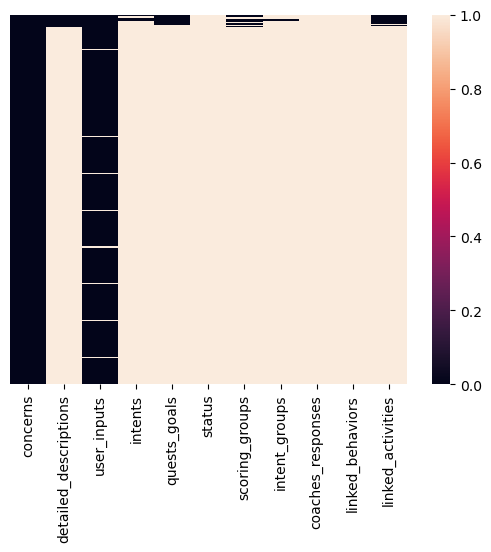

In [7]:
sns.heatmap(df_concerns.isnull(), yticklabels = False)

<Axes: xlabel='concerns', ylabel='count'>

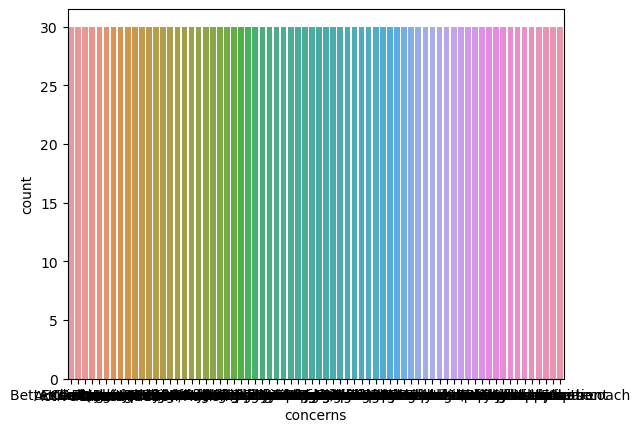

In [8]:
# Plot the count plot for the concerns
sns.countplot(x = df_concerns['concerns'])

# Exploratory Data Analysis 

## General Information of the Data Samples

In [9]:
# an idea of the size of the dataset
print("Shape of the dataset:", df_concerns.shape)

Shape of the dataset: (2100, 11)


In [10]:
# understand what features are present
print("Column names:", df_concerns.columns)

Column names: Index(['concerns', 'detailed_descriptions', 'user_inputs', 'intents',
       'quests_goals', 'status', 'scoring_groups', 'intent_groups',
       'coaches_responses', 'linked_behaviors', 'linked_activities'],
      dtype='object')


In [11]:
# understanding how to handle each feature during analysis.
# after discussion, user_inputs as the only input feature
print("Data types of each column:")
print(df_concerns.dtypes)

Data types of each column:
concerns                  object
detailed_descriptions     object
user_inputs               object
intents                   object
quests_goals              object
status                   float64
scoring_groups            object
intent_groups             object
coaches_responses        float64
linked_behaviors          object
linked_activities         object
dtype: object


Summary Statistics: Compute summary statistics for numerical columns. This provides insights into central tendency, dispersion, and distribution of your numerical features.

In [12]:
print("Summary statistics for numerical columns:")
print(df_concerns.describe())

Summary statistics for numerical columns:
       status  coaches_responses
count     0.0                0.0
mean      NaN                NaN
std       NaN                NaN
min       NaN                NaN
25%       NaN                NaN
50%       NaN                NaN
75%       NaN                NaN
max       NaN                NaN


## User Inputs Length

In [13]:
# Check for NaN values in 'user_inputs' column
nan_indices = df_concerns['user_inputs'].isnull()
# Fill NaN values with empty strings
df_concerns['user_inputs'].fillna('', inplace=True)

# get the length of the user_inputs column
df_concerns['length'] = df_concerns['user_inputs'].apply(len)
df_concerns.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11544\2564966196.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_concerns['user_inputs'].fillna('', inplace=True)


concerns                              detailed_descriptions  \
0  Better academics  want/need to do better in school.  If just not...   
1      Active Quest         user is a primary or participating quester   
2             ADHD                diagnosed with ADHD or suspects ADHD   
3    Excess Alcohol  dealing with stress by excessive drinking, bin...   
4            Anger   difficulty controlling anger or rage, needs he...   

                                         user_inputs  \
0  want/need to do better in school.  If just not...   
1         user is a primary or participating quester   
2               diagnosed with ADHD or suspects ADHD   
3  dealing with stress by excessive drinking, bin...   
4  difficulty controlling anger or rage, needs he...   

                                             intents  \
0  MoodFrustrated, MoodStressed, Mood-Journal, Pe...   
1                                                NaN   
2  Tardies, Absences, MoodFrustrated, Invite Chec...   
3                                           Absences   
4                          MoodAngry, MoodFrustrated   

                                        quests_goals  status  \
0  Plan better (time management), Finish what I s...     NaN   
1                                                NaN     NaN   
2  Take care of my body, Healthy relationship wit...     NaN   
3  Practice impulse control and moderation, Cut m...     NaN   
4  Winning and losing graciously, Practice impuls...     NaN   

                                      scoring_groups intent_groups  \
0                                                NaN           NaN   
1                                                NaN           NaN   
2  Special Ed, Access/Tangible Function, Escape/A...           NaN   
3  Alcohol Suspected, High difficulties, Slightly...           NaN   
4  High difficulties, Slightly raised difficultie...           NaN   

   coaches_responses                       linked_behaviors  \
0                NaN  Doing something other than assignment   
1                NaN                                    NaN   
2                NaN  Doing something other than assignment   
3                NaN                         Binge drinking   
4                NaN                                    NaN   

                                   linked_activities  length  
0  apply to 5 colleges, apply to 5 jobs, assemble...     111  
1                                                NaN      42  
2  take my medication(s) as prescribed, Be ready ...      36  
3                      Arrange childcare for a night      90  
4  do a body check in, Become more self aware by ...      85

<Axes: ylabel='Frequency'>

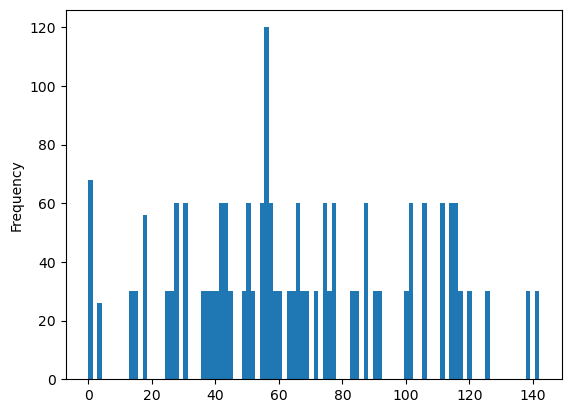

In [14]:
# Plot the histogram for the length
df_concerns['length'].plot(bins = 100, kind = 'hist')

In [15]:
# Apply the describe method to get statistical summary
df_concerns.describe()

status  coaches_responses       length
count     0.0                0.0  2100.000000
mean      NaN                NaN    65.402857
std       NaN                NaN    34.515618
min       NaN                NaN     0.000000
25%       NaN                NaN    42.000000
50%       NaN                NaN    59.500000
75%       NaN                NaN    90.000000
max       NaN                NaN   142.000000

In [16]:
# Let's see the longest message 
df_concerns[df_concerns['length'] == 38.000000]

concerns                   detailed_descriptions  \
45    Suicidal Ideations  having thoughts about suicide or dying   
115   Suicidal Ideations                                     NaN   
185   Suicidal Ideations                                     NaN   
255   Suicidal Ideations                                     NaN   
325   Suicidal Ideations                                     NaN   
395   Suicidal Ideations                                     NaN   
465   Suicidal Ideations                                     NaN   
535   Suicidal Ideations                                     NaN   
605   Suicidal Ideations                                     NaN   
675   Suicidal Ideations                                     NaN   
745   Suicidal Ideations                                     NaN   
815   Suicidal Ideations                                     NaN   
885   Suicidal Ideations                                     NaN   
955   Suicidal Ideations                                     NaN   
1025  Suicidal Ideations                                     NaN   
1095  Suicidal Ideations                                     NaN   
1165  Suicidal Ideations                                     NaN   
1235  Suicidal Ideations                                     NaN   
1305  Suicidal Ideations                                     NaN   
1375  Suicidal Ideations                                     NaN   
1445  Suicidal Ideations                                     NaN   
1515  Suicidal Ideations                                     NaN   
1585  Suicidal Ideations                                     NaN   
1655  Suicidal Ideations                                     NaN   
1725  Suicidal Ideations                                     NaN   
1795  Suicidal Ideations                                     NaN   
1865  Suicidal Ideations                                     NaN   
1935  Suicidal Ideations                                     NaN   
2005  Suicidal Ideations                                     NaN   
2075  Suicidal Ideations                                     NaN   

                                 user_inputs intents quests_goals  status  \
45    having thoughts about suicide or dying     NaN          NaN     NaN   
115   having thoughts about suicide or dying     NaN          NaN     NaN   
185   having thoughts about suicide or dying     NaN          NaN     NaN   
255   having thoughts about suicide or dying     NaN          NaN     NaN   
325   having thoughts about suicide or dying     NaN          NaN     NaN   
395   having thoughts about suicide or dying     NaN          NaN     NaN   
465   having thoughts about suicide or dying     NaN          NaN     NaN   
535   having thoughts about suicide or dying     NaN          NaN     NaN   
605   having thoughts about suicide or dying     NaN          NaN     NaN   
675   having thoughts about suicide or dying     NaN          NaN     NaN   
745   having thoughts about suicide or dying     NaN          NaN     NaN   
815   having thoughts about suicide or dying     NaN          NaN     NaN   
885   having thoughts about suicide or dying     NaN          NaN     NaN   
955   having thoughts about suicide or dying     NaN          NaN     NaN   
1025  having thoughts about suicide or dying     NaN          NaN     NaN   
1095  having thoughts about suicide or dying     NaN          NaN     NaN   
1165  having thoughts about suicide or dying     NaN          NaN     NaN   
1235  having thoughts about suicide or dying     NaN          NaN     NaN   
1305  having thoughts about suicide or dying     NaN          NaN     NaN   
1375  having thoughts about suicide or dying     NaN          NaN     NaN   
1445  having thoughts about suicide or dying     NaN          NaN     NaN   
1515  having thoughts about suicide or dying     NaN          NaN     NaN   
1585  having thoughts about suicide or dying     NaN          NaN     NaN   
1655  having thoughts about suicide or dying     NaN       

In [17]:
df_concerns[df_concerns['length'] == 38.000000]['user_inputs'].iloc[0]

'having thoughts about suicide or dying'

## Missing Values
Missing Values: Identify if there are any missing values in your dataset. Missing data can affect analysis and modeling results.

In [18]:
# Check for null values in each column
null_counts = df_concerns.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
concerns                    0
detailed_descriptions    2034
user_inputs                 0
intents                  2077
quests_goals             2046
status                   2100
scoring_groups           2054
intent_groups            2090
coaches_responses        2100
linked_behaviors         2094
linked_activities        2050
length                      0
dtype: int64


In [19]:
# Calculate the total number of rows
total_rows = len(df_concerns)
# Calculate the percentage of null values in each column
null_percentages = (df_concerns.isnull().sum() / total_rows) * 100

# Format the percentages
formatted_percentages = null_percentages.map("{:.2f}%".format)
print("Percentage of null values in each column:")
print(formatted_percentages)

Percentage of null values in each column:
concerns                   0.00%
detailed_descriptions     96.86%
user_inputs                0.00%
intents                   98.90%
quests_goals              97.43%
status                   100.00%
scoring_groups            97.81%
intent_groups             99.52%
coaches_responses        100.00%
linked_behaviors          99.71%
linked_activities         97.62%
length                     0.00%
dtype: object


In [20]:
# Filter columns where null percentage is less than 20%
filtered_columns = null_percentages[null_percentages < 20]

# Print the filtered columns along with their null percentages
print("Columns with less than 30% null values:")
for column, percentages in filtered_columns.items():
    print(f"{column}: {percentages:.2f}%")

Columns with less than 30% null values:
concerns: 0.00%
user_inputs: 0.00%
length: 0.00%


## Unique Values
Check the unique values in categorical or discrete columns. This helps us understand the diversity and distribution of categorical variables.

In [21]:
print("Unique values in each column:")
for column in df_concerns.columns:
    print(column, ":", df_concerns[column].unique())

Unique values in each column:
concerns : ['Better academics' 'Active Quest' 'ADHD ' 'Excess Alcohol' 'Anger '
 'Clinical Anxiety' 'Attendance Problems' 'Autism (Self)'
 'Challenging Behaviors' 'Job Hunting' 'Communication Deficits' 'Bored'
 'Discrimination/Racism' 'Drug Use' 'Executive Functioning Skills'
 'Good Families' 'Build wealth' 'Bad Friends' 'Hyperactivity/Inattention'
 'Intellectual disability ID' 'Learning disability' 'Poor Marriage'
 'Poor Mental Health' 'Motivation and procrastination' 'Parenting Stress'
 'Perfectionism' 'Personal Care and Hygiene' 'Declining physical health'
 'Resilience' 'Self-Regulation and Coping' 'Estranged families'
 'Need Tolerance Inclusion' 'Trauma' 'Stress' 'Debt' 'Sleep Disturbance'
 'Eating Disorder' 'Aging' 'Vaping/Smoking' 'Maintaining Employment'
 'Just Relocated' 'Diagnosed Depression' 'Behind on work' 'FBA'
 'Sibling Rivalry' 'Suicidal Ideations' 'Suicide Risk' 'Emotional Abuse'
 'Divorcing parents' 'No Friends' 'SPED caregiver'
 'Transiti

## How many categories in the dependent variable

The dependent variable is "concerns" which is classified and defined by clinicians, domain experts, business roles, etc.


In [22]:
distinct_concerns = df_concerns['concerns'].unique()

print("Distinct values in 'concerns' column with IDs: ")
for idx, value in enumerate(distinct_concerns, start=1):
    print(f"{idx}: {value}")

Distinct values in 'concerns' column with IDs: 
1: Better academics
2: Active Quest
3: ADHD 
4: Excess Alcohol
5: Anger 
6: Clinical Anxiety
7: Attendance Problems
8: Autism (Self)
9: Challenging Behaviors
10: Job Hunting
11: Communication Deficits
12: Bored
13: Discrimination/Racism
14: Drug Use
15: Executive Functioning Skills
16: Good Families
17: Build wealth
18: Bad Friends
19: Hyperactivity/Inattention
20: Intellectual disability ID
21: Learning disability
22: Poor Marriage
23: Poor Mental Health
24: Motivation and procrastination
25: Parenting Stress
26: Perfectionism
27: Personal Care and Hygiene
28: Declining physical health
29: Resilience
30: Self-Regulation and Coping
31: Estranged families
32: Need Tolerance Inclusion
33: Trauma
34: Stress
35: Debt
36: Sleep Disturbance
37: Eating Disorder
38: Aging
39: Vaping/Smoking
40: Maintaining Employment
41: Just Relocated
42: Diagnosed Depression
43: Behind on work
44: FBA
45: Sibling Rivalry
46: Suicidal Ideations
47: Suicide Risk


# Feature Engineering / Text Processing Pipeline


## Convert to list format

In [23]:
# Convert to list format
inputs = df_concerns['user_inputs'].tolist()
len(inputs)

2100

In [24]:
# Join all inputs into one large string
inputs_as_one_string = ''.join(inputs)
inputs_as_one_string

'want/need to do better in school.  If just not doing the work, tag behind on work or motivation/procrastinationuser is a primary or participating questerdiagnosed with ADHD or suspects ADHDdealing with stress by excessive drinking, binge drinking, relationships and connectednessdifficulty controlling anger or rage, needs help with mindfulness and self-regulationfor preclinical, go to stress\nuser has problems going to and staying at school or work on time/for required time consistently, frequent call-outsdiagnosed with autism (with or without speech delay), pervasive developmental disorder, global delaysDo we need separate ones for adult and kids? @Caitlin Ryan Marcus\xa0If so the school conduct problem can be for kids.\ntough job market, hard to find employment after college even if highly qualified, tons of competitionwant to become a more effective communicator, advocate for self, improve relationships\nno purpose, nothing to do\nuser is part of a marginalized group, exclusion, bul

## Remove punctuation

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
inputs_as_one_string_punc_removed = [char for char in inputs_as_one_string if char not in string.punctuation]
inputs_as_one_string_punc_removed

['w',
 'a',
 'n',
 't',
 'n',
 'e',
 'e',
 'd',
 ' ',
 't',
 'o',
 ' ',
 'd',
 'o',
 ' ',
 'b',
 'e',
 't',
 't',
 'e',
 'r',
 ' ',
 'i',
 'n',
 ' ',
 's',
 'c',
 'h',
 'o',
 'o',
 'l',
 ' ',
 ' ',
 'I',
 'f',
 ' ',
 'j',
 'u',
 's',
 't',
 ' ',
 'n',
 'o',
 't',
 ' ',
 'd',
 'o',
 'i',
 'n',
 'g',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'w',
 'o',
 'r',
 'k',
 ' ',
 't',
 'a',
 'g',
 ' ',
 'b',
 'e',
 'h',
 'i',
 'n',
 'd',
 ' ',
 'o',
 'n',
 ' ',
 'w',
 'o',
 'r',
 'k',
 ' ',
 'o',
 'r',
 ' ',
 'm',
 'o',
 't',
 'i',
 'v',
 'a',
 't',
 'i',
 'o',
 'n',
 'p',
 'r',
 'o',
 'c',
 'r',
 'a',
 's',
 't',
 'i',
 'n',
 'a',
 't',
 'i',
 'o',
 'n',
 'u',
 's',
 'e',
 'r',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'p',
 'r',
 'i',
 'm',
 'a',
 'r',
 'y',
 ' ',
 'o',
 'r',
 ' ',
 'p',
 'a',
 'r',
 't',
 'i',
 'c',
 'i',
 'p',
 'a',
 't',
 'i',
 'n',
 'g',
 ' ',
 'q',
 'u',
 'e',
 's',
 't',
 'e',
 'r',
 'd',
 'i',
 'a',
 'g',
 'n',
 'o',
 's',
 'e',
 'd',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'A',
 'D',
 'H'

In [27]:
# Join the characters again to form the string.
inputs_as_one_string_punc_removed_join = ''.join(inputs_as_one_string_punc_removed)
inputs_as_one_string_punc_removed_join

'wantneed to do better in school  If just not doing the work tag behind on work or motivationprocrastinationuser is a primary or participating questerdiagnosed with ADHD or suspects ADHDdealing with stress by excessive drinking binge drinking relationships and connectednessdifficulty controlling anger or rage needs help with mindfulness and selfregulationfor preclinical go to stress\nuser has problems going to and staying at school or work on timefor required time consistently frequent calloutsdiagnosed with autism with or without speech delay pervasive developmental disorder global delaysDo we need separate ones for adult and kids Caitlin Ryan Marcus\xa0If so the school conduct problem can be for kids\ntough job market hard to find employment after college even if highly qualified tons of competitionwant to become a more effective communicator advocate for self improve relationships\nno purpose nothing to do\nuser is part of a marginalized group exclusion bullying microaggressioncocai

## Remove stopwords

In [28]:
import nltk # Natural Language tool kit 
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
# inputs_as_one_string_punc_removed_join 
inputs_as_one_string_punc_stopwords_removed_join_clean = [word for word in inputs_as_one_string_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
inputs_as_one_string_punc_stopwords_removed_join_clean

['wantneed',
 'better',
 'school',
 'work',
 'tag',
 'behind',
 'work',
 'motivationprocrastinationuser',
 'primary',
 'participating',
 'questerdiagnosed',
 'ADHD',
 'suspects',
 'ADHDdealing',
 'stress',
 'excessive',
 'drinking',
 'binge',
 'drinking',
 'relationships',
 'connectednessdifficulty',
 'controlling',
 'anger',
 'rage',
 'needs',
 'help',
 'mindfulness',
 'selfregulationfor',
 'preclinical',
 'go',
 'stress',
 'user',
 'problems',
 'going',
 'staying',
 'school',
 'work',
 'timefor',
 'required',
 'time',
 'consistently',
 'frequent',
 'calloutsdiagnosed',
 'autism',
 'without',
 'speech',
 'delay',
 'pervasive',
 'developmental',
 'disorder',
 'global',
 'delaysDo',
 'need',
 'separate',
 'ones',
 'adult',
 'kids',
 'Caitlin',
 'Ryan',
 'Marcus',
 'school',
 'conduct',
 'problem',
 'kids',
 'tough',
 'job',
 'market',
 'hard',
 'find',
 'employment',
 'college',
 'even',
 'highly',
 'qualified',
 'tons',
 'competitionwant',
 'become',
 'effective',
 'communicator',
 'ad

## Perform Count Vectorization (Tokenization)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(inputs_as_one_string_punc_stopwords_removed_join_clean)

print(vectorizer.get_feature_names_out() )

['aba' 'ability' 'abuse' 'abusemoved' 'act' 'addiction' 'adhd'
 'adhddealing' 'adult' 'adults' 'advocate' 'agency' 'ahead' 'already'
 'also' 'anger' 'anxietywants' 'appearance' 'approaching' 'arguments'
 'asleep' 'assault' 'assimilation' 'auditory' 'autism' 'backoverreacting'
 'become' 'behind' 'better' 'bigots' 'bills' 'binge' 'bipolar'
 'bondsusers' 'bounce' 'boundaries' 'boundariesgeneral' 'bp2lupus'
 'bulimia' 'bullying' 'burnout' 'caitlin' 'calloutsdiagnosed' 'calls'
 'cant' 'capacities' 'care' 'caregiver' 'caring' 'certain' 'changes'
 'childhoodone' 'choking' 'cigarette' 'clinical' 'coach' 'coachwantneed'
 'cocaine' 'college' 'communication' 'communicator' 'competitionwant'
 'competitivepunching' 'conduct' 'confidence' 'connectednessdifficulty'
 'connecting' 'consistently' 'control' 'controlling' 'conversations'
 'crack' 'culture' 'cyclothymia' 'debt' 'delay' 'delaysdo' 'depression'
 'developmental' 'diabetes' 'diagnosessore' 'diagnosisdiagnosis'
 'difficulties' 'disabilities' 'd

In [31]:
print(X.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [33]:
df_concerns_clean = df_concerns['user_inputs'].apply(message_cleaning)

print(df_concerns['user_inputs'][5]) 

for preclinical, go to stress



In [34]:
# show the cleaned up version
print(df_concerns_clean[5])

['preclinical', 'go', 'stress']


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
inputs_countvectorizer = vectorizer.fit_transform(df_concerns['user_inputs'])

print(vectorizer.get_feature_names_out())

['1' '2' '7' 'ABA' 'ADHD' 'BP2' 'Caitlin' 'Consuming' 'Dyslexia' 'ESL'
 'FBA' 'Fear' 'IQ' 'Interpersonal' 'Marcus' 'Poor' 'PreADHD'
 'Prediagnosis' 'Ryan' 'Unhealthy' 'ability' 'abuse' 'act' 'action'
 'addiction' 'adhd' 'adult' 'adults' 'advocate' 'agency' 'ahead' 'already'
 'also' 'anger' 'anorexia' 'anxiety' 'appearance' 'approaching'
 'arguments' 'asleep' 'assault' 'assimilation' 'auditory' 'autism' 'back'
 'bad' 'become' 'behind' 'better' 'bigots' 'bills' 'binge' 'bipolar'
 'bonds' 'boss' 'bounce' 'boundaries' 'bulimia' 'bullying' 'burnout'
 'callouts' 'calls' 'cant' 'capacities' 'care' 'caregiver' 'caring'
 'certain' 'changes' 'childhood' 'choking' 'cigarette' 'clinical' 'coach'
 'cocaine' 'college' 'communication' 'communicator' 'competition'
 'competitive' 'conduct' 'confidence' 'connectedness' 'connecting'
 'consistently' 'control' 'controlling' 'conversations' 'crack' 'culture'
 'cyclothymia' 'dealing' 'debt' 'delay' 'delays' 'depression'
 'developmental' 'diabetes' 'diagnosed

In [36]:
print(inputs_countvectorizer.toarray())  

[[0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
inputs_countvectorizer.shape

(2100, 363)

In [38]:
user_inputs = pd.DataFrame(inputs_countvectorizer.toarray())

In [39]:
X = user_inputs
X

0    1    2    3    4    5    6    7    8    9    ...  353  354  355  \
0       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2       0    0    0    0    2    0    0    0    0    0  ...    0    0    0   
3       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2095    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2096    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2097    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2098    0    0    0    0    0    0    0    0    0    1  ...    0    0    0   
2099    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      356  357  358  359  360  361  362  
0       0    1    0    0    2    0    0  
1       0    0    0    0    0    0    0  
2       0    0    0    0    0    0    0  
3       0    0    0    0    0    0    0  
4       0    0    0    0    0    0    0  
...   ...  ...  ...  ...  ...  ...  ...  
2095    0    0    0    0    0    0    0  
2096    0    0    0    0    0    0    0  
2097    0    0    0    0    0    0    0  
2098    0    0    0    0    0    0    0  
2099    0    0    0    0    0    0    0  

[2100 rows x 363 columns]

In [40]:
y = df_concerns['concerns']
y

0          Better academics
1              Active Quest
2                     ADHD 
3            Excess Alcohol
4                    Anger 
               ...         
2095            Child abuse
2096    Incarcerated parent
2097           Active Abuse
2098                    ESL
2099     unhappy with coach
Name: concerns, Length: 2100, dtype: object

In [41]:
X.shape

(2100, 363)

In [42]:
y.shape

(2100,)

# 4. Model Training

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

D:\virtual_env\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\virtual_env\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\virtual_env\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                        precision    recall  f1-score   support

                                 ADHD        1.00      1.00      1.00         5
                          Active Abuse       1.00      1.00      1.00         4
                          Active Quest       1.00      1.00      1.00         4
                                 Aging       1.00      1.00      1.00         4
                                Anger        1.00      1.00      1.00         6
                   Attendance Problems       1.00      1.00      1.00         8
                         Autism (Self)       1.00      1.00      1.00         4
                           Bad Friends       1.00      1.00      1.00         8
                        Behind on work       1.00      1.00      1.00         9
                      Better academics       1.00      1.00      1.00         6
                               Bipolar       1.00      1.00      1.00         8
                                 Bored 

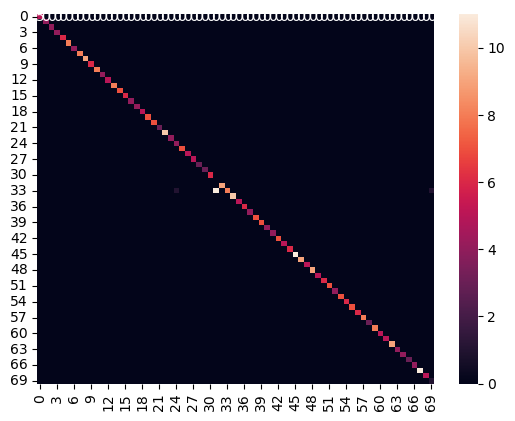

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))